In [3]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1c/19/bf19123baf16a55fd38cbb100b5a49380b9b6db7279987034689d11254c7/yfinance-0.2.32-py2.py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/b6/2c/e391d6d57bbd837d383a6b69b54ecb4768d75b31d8bc7a380b4b4afe4cb2/frozendict-2.3.10-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.9 MB 2.6 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/2.9 MB 6.0 MB/s eta 0:00:01
     ----------- ---------------------------- 0.8/2.9 MB 6.6 MB/s eta 0:00:01
     ------------- -------------------------- 1.0/2.9 MB 6.1 MB/s eta 0:00:01
     ------------- -------------------------- 1.0/2.9 MB 6.1 MB/s eta 0:00:01
     --------------- ---------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [81]:
import pandas as pd
import yfinance as yf

In [82]:
Silver_ticker='SI=F'

In [83]:
# Define the date range for the last quarter
start_date = '2018-12-01'
end_date = '2023-12-01'

# Fetch historical stock price data using yfinance
silver_data = yf.download(Silver_ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [84]:
df=silver_data
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-03,14.210,14.475,14.185,14.381,14.381,342
2018-12-04,14.385,14.521,14.385,14.521,14.521,65
2018-12-06,14.420,14.420,14.330,14.390,14.390,48
2018-12-07,14.405,14.572,14.405,14.572,14.572,88
2018-12-10,14.565,14.565,14.478,14.478,14.478,42


In [85]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-24,24.315001,24.329000,24.260000,24.329000,24.329000,4
2023-11-27,24.805000,24.850000,24.672001,24.672001,24.672001,14
2023-11-28,24.930000,24.930000,24.930000,24.930000,24.930000,59633
2023-11-29,25.049999,25.305000,24.850000,25.072001,25.072001,5716
2023-11-30,25.035000,25.325001,24.965000,25.292999,25.292999,5716


In [86]:
df.shape

(1257, 6)

In [88]:
df1=df.reset_index()['Close']

In [89]:
df1.shape

(1257,)

In [90]:
df1

0       14.381000
1       14.521000
2       14.390000
3       14.572000
4       14.478000
          ...    
1252    24.329000
1253    24.672001
1254    24.930000
1255    25.072001
1256    25.292999
Name: Close, Length: 1257, dtype: float64

In [58]:
df1.head(450)

0      14.381000
1      14.521000
2      14.390000
3      14.572000
4      14.478000
         ...    
445    27.163000
446    26.739000
447    27.229000
448    27.346001
449    27.355000
Name: Close, Length: 450, dtype: float64

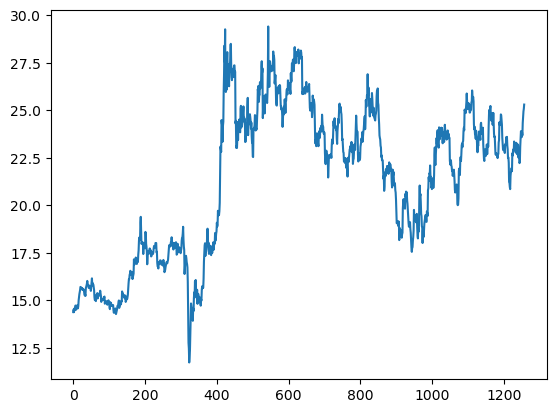

In [91]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [64]:
### LSTM are sensitive to the scale of the data . So we apply MinMax Scaler

In [65]:
import numpy as np

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [93]:
df1

array([[0.14980466],
       [0.15773085],
       [0.15031425],
       ...,
       [0.74704183],
       [0.75508125],
       [0.76759321]])

# Splitting the data into Train and Test Data

In [94]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [95]:
training_size,test_size

(817, 440)

In [96]:
train_data

array([[0.14980466],
       [0.15773085],
       [0.15031425],
       [0.16061823],
       [0.15529637],
       [0.1564853 ],
       [0.16928045],
       [0.16950689],
       [0.15727791],
       [0.16441149],
       [0.16135426],
       [0.16797825],
       [0.17086568],
       [0.16124103],
       [0.16792167],
       [0.18507614],
       [0.19566326],
       [0.20330637],
       [0.20936419],
       [0.2155353 ],
       [0.22482027],
       [0.22419746],
       [0.22272546],
       [0.22029103],
       [0.22181962],
       [0.21661099],
       [0.21751683],
       [0.21932856],
       [0.21576174],
       [0.21678086],
       [0.21128914],
       [0.20353281],
       [0.1995131 ],
       [0.20279684],
       [0.19832418],
       [0.22102701],
       [0.22499008],
       [0.22934951],
       [0.23467136],
       [0.24271072],
       [0.23467136],
       [0.23223688],
       [0.22957595],
       [0.22198948],
       [0.22306518],
       [0.22861348],
       [0.22204607],
       [0.222

In [97]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [98]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [99]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [100]:

print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [101]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [102]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [103]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [104]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_8 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 194ms/step - loss: 0.0771 - val_loss: 0.0243
Epoch 2/100
12/12 [==============================] - 1s 87ms/step - loss: 0.0202 - val_loss: 0.0118
Epoch 3/100
12/12 [==============================] - 1s 82ms/step - loss: 0.0097 - val_loss: 0.0040
Epoch 4/100
12/12 [==============================] - 1s 83ms/step - loss: 0.0070 - val_loss: 0.0047
Epoch 5/100
12/12 [==============================] - 1s 83ms/step - loss: 0.0058 - val_loss: 0.0042
Epoch 6/100
12/12 [==============================] - 1s 84ms/step - loss: 0.0054 - val_loss: 0.0044
Epoch 7/100
12/12 [==============================] - 1s 86ms/step - loss: 0.0052 - val_loss: 0.0041
Epoch 8/100
12/12 [==============================] - 1s 86ms/step - loss: 0.0050 - val_loss: 0.0038
Epoch 9/100
12/12 [==============================] - 1s 89ms/step - loss: 0.0049 - val_loss: 0.0038
Epoch 10/100
12/12 [==============================] - 1s 89ms/step - loss: 0.0048 - val_loss: 0.004

In [106]:
import tensorflow as tf

In [107]:
tf.__version__

'2.15.0'

In [142]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 18ms/step


In [143]:
train_predict

array([[0.19203976],
       [0.19229679],
       [0.19048522],
       [0.1865474 ],
       [0.1846752 ],
       [0.18462618],
       [0.1857248 ],
       [0.1867264 ],
       [0.1866567 ],
       [0.18591966],
       [0.18484211],
       [0.18406905],
       [0.18370098],
       [0.18156901],
       [0.17731185],
       [0.17271371],
       [0.1685507 ],
       [0.16564447],
       [0.16520683],
       [0.16615205],
       [0.16592859],
       [0.16521613],
       [0.16502081],
       [0.16587155],
       [0.16863465],
       [0.17262912],
       [0.17694552],
       [0.18160091],
       [0.18683055],
       [0.18879396],
       [0.18858974],
       [0.18735473],
       [0.18700936],
       [0.18690921],
       [0.18711975],
       [0.188773  ],
       [0.19100893],
       [0.19733244],
       [0.20436527],
       [0.21110886],
       [0.21587458],
       [0.21839139],
       [0.218462  ],
       [0.21742184],
       [0.21483181],
       [0.21202962],
       [0.21052447],
       [0.207

In [144]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [145]:
#Calculate RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.672220456278794

In [146]:
math.sqrt(mean_squared_error(ytest,test_predict))

22.35009783662124

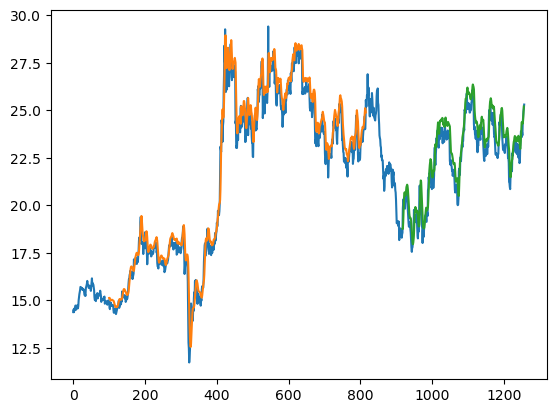

In [147]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [148]:
len(test_data)

440

In [193]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [194]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [195]:
temp_input

[0.701126596896852,
 0.7378700792543641,
 0.7517975137302259,
 0.7421728709126326,
 0.7557605828929638,
 0.763403691129188,
 0.7399648906627553,
 0.7339070100916262,
 0.7190737929417307,
 0.7328879505905702,
 0.7410972269908335,
 0.7077506456320201,
 0.7153371694475011,
 0.7427390390766718,
 0.7061654179669249,
 0.680461944844336,
 0.6709505788537647,
 0.6727056677666253,
 0.6458132738952148,
 0.621751612858464,
 0.6179584049434915,
 0.6233935329298382,
 0.6193171869400781,
 0.6176186824479609,
 0.6148445340340444,
 0.6083337621258983,
 0.6190907412715697,
 0.6205061076888995,
 0.6549850253757911,
 0.6615523817046801,
 0.7149408625312274,
 0.7063352792146903,
 0.7068447549724505,
 0.7078639224590423,
 0.7383796629976601,
 0.7359451290937383,
 0.7211119119438428,
 0.7075241999635117,
 0.6693653511886696,
 0.6494366205624221,
 0.634943125908057,
 0.6316593937508447,
 0.6436052936453375,
 0.644964075641924,
 0.6327917300789229,
 0.6235067017713246,
 0.644907383235645,
 0.6509086793860309,

# Predictions for next 30 Days

In [196]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.79055685]
101
1 day input [0.73787008 0.75179751 0.74217287 0.75576058 0.76340369 0.73996489
 0.73390701 0.71907379 0.73288795 0.74109723 0.70775065 0.71533717
 0.74273904 0.70616542 0.68046194 0.67095058 0.67270567 0.64581327
 0.62175161 0.6179584  0.62339353 0.61931719 0.61761868 0.61484453
 0.60833376 0.61909074 0.62050611 0.65498503 0.66155238 0.71494086
 0.70633528 0.70684475 0.70786392 0.73837966 0.73594513 0.72111191
 0.7075242  0.66936535 0.64943662 0.63494313 0.63165939 0.64360529
 0.64496408 0.63279173 0.6235067  0.64490738 0.65090868 0.64875728
 0.67055427 0.66291116 0.67151675 0.64598314 0.63494313 0.6081639
 0.6103153  0.5945196  0.53688502 0.53462035 0.5220517  0.51593723
 0.55511525 0.56649487 0.56847641 0.57872391 0.5693823  0.62231778
 0.61569384 0.63001758 0.6346034  0.63137626 0.6576459  0.6418502
 0.63664152 0.6308102  0.62571479 0.62475231 0.65373941 0.62877197
 0.61993994 0.62367656 0.64915359 0.64620958 0.60991899 0.61778854
 0.6282058  0.59333068 0.59808637 0

8 day output [[0.91062057]]
9 day input [0.73288795 0.74109723 0.70775065 0.71533717 0.74273904 0.70616542
 0.68046194 0.67095058 0.67270567 0.64581327 0.62175161 0.6179584
 0.62339353 0.61931719 0.61761868 0.61484453 0.60833376 0.61909074
 0.62050611 0.65498503 0.66155238 0.71494086 0.70633528 0.70684475
 0.70786392 0.73837966 0.73594513 0.72111191 0.7075242  0.66936535
 0.64943662 0.63494313 0.63165939 0.64360529 0.64496408 0.63279173
 0.6235067  0.64490738 0.65090868 0.64875728 0.67055427 0.66291116
 0.67151675 0.64598314 0.63494313 0.6081639  0.6103153  0.5945196
 0.53688502 0.53462035 0.5220517  0.51593723 0.55511525 0.56649487
 0.56847641 0.57872391 0.5693823  0.62231778 0.61569384 0.63001758
 0.6346034  0.63137626 0.6576459  0.6418502  0.63664152 0.6308102
 0.62571479 0.62475231 0.65373941 0.62877197 0.61993994 0.62367656
 0.64915359 0.64620958 0.60991899 0.61778854 0.6282058  0.59333068
 0.59808637 0.64224651 0.66523242 0.68827491 0.68357582 0.67055427
 0.68550077 0.67581954 0.

16 day output [[0.99830496]]
17 day input [0.67270567 0.64581327 0.62175161 0.6179584  0.62339353 0.61931719
 0.61761868 0.61484453 0.60833376 0.61909074 0.62050611 0.65498503
 0.66155238 0.71494086 0.70633528 0.70684475 0.70786392 0.73837966
 0.73594513 0.72111191 0.7075242  0.66936535 0.64943662 0.63494313
 0.63165939 0.64360529 0.64496408 0.63279173 0.6235067  0.64490738
 0.65090868 0.64875728 0.67055427 0.66291116 0.67151675 0.64598314
 0.63494313 0.6081639  0.6103153  0.5945196  0.53688502 0.53462035
 0.5220517  0.51593723 0.55511525 0.56649487 0.56847641 0.57872391
 0.5693823  0.62231778 0.61569384 0.63001758 0.6346034  0.63137626
 0.6576459  0.6418502  0.63664152 0.6308102  0.62571479 0.62475231
 0.65373941 0.62877197 0.61993994 0.62367656 0.64915359 0.64620958
 0.60991899 0.61778854 0.6282058  0.59333068 0.59808637 0.64224651
 0.66523242 0.68827491 0.68357582 0.67055427 0.68550077 0.67581954
 0.71301591 0.73243506 0.74704183 0.75508125 0.76759321 0.79055685
 0.80533445 0.821354

24 day output [[1.045857]]
25 day input [0.60833376 0.61909074 0.62050611 0.65498503 0.66155238 0.71494086
 0.70633528 0.70684475 0.70786392 0.73837966 0.73594513 0.72111191
 0.7075242  0.66936535 0.64943662 0.63494313 0.63165939 0.64360529
 0.64496408 0.63279173 0.6235067  0.64490738 0.65090868 0.64875728
 0.67055427 0.66291116 0.67151675 0.64598314 0.63494313 0.6081639
 0.6103153  0.5945196  0.53688502 0.53462035 0.5220517  0.51593723
 0.55511525 0.56649487 0.56847641 0.57872391 0.5693823  0.62231778
 0.61569384 0.63001758 0.6346034  0.63137626 0.6576459  0.6418502
 0.63664152 0.6308102  0.62571479 0.62475231 0.65373941 0.62877197
 0.61993994 0.62367656 0.64915359 0.64620958 0.60991899 0.61778854
 0.6282058  0.59333068 0.59808637 0.64224651 0.66523242 0.68827491
 0.68357582 0.67055427 0.68550077 0.67581954 0.71301591 0.73243506
 0.74704183 0.75508125 0.76759321 0.79055685 0.80533445 0.82135421
 0.83736813 0.8529824  0.86813289 0.88280362 0.89697361 0.91062057
 0.92372143 0.93625343 0

In [200]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [201]:
len(df1)

1257

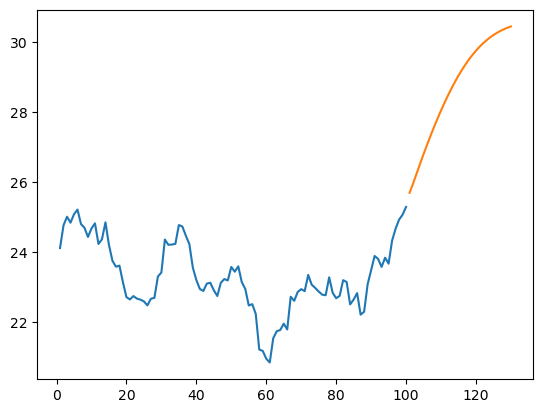

In [202]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

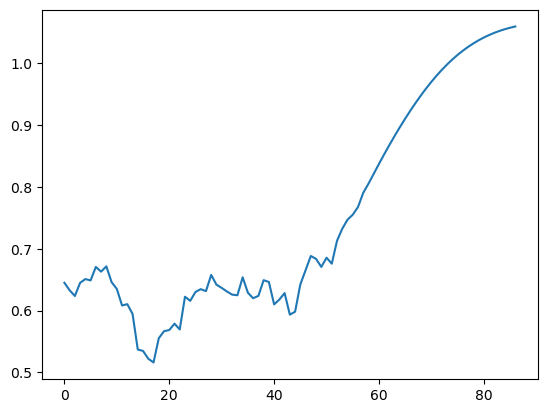

In [203]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [204]:
df3=scaler.inverse_transform(df3).tolist()

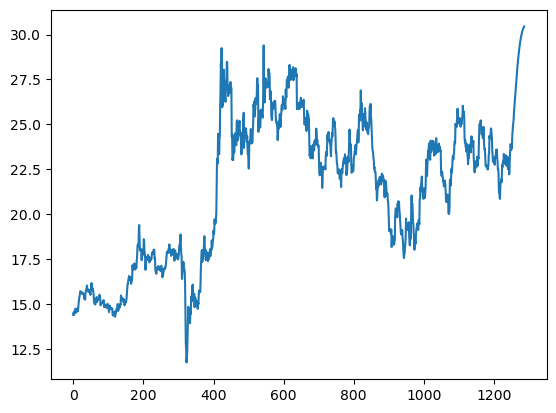

In [205]:
plt.plot(df3)

In [206]:
import pandas as pd

# Sample list
data_list = df3

# Assuming column names are 'ID', 'Name', 'Age'
column_names = ['Closing']

# Convert list to DataFrame
rate = pd.DataFrame(data_list, columns=column_names)

# Display the DataFrame
print(rate.tail(0))


        Closing
1247  23.892000
1248  23.809000
1249  23.579000
1250  23.843000
1251  23.672001
1252  24.329000
1253  24.672001
1254  24.930000
1255  25.072001
1256  25.292999
1257  25.698606
1258  25.959623
1259  26.242580
1260  26.525434
1261  26.801229
1262  27.068832
1263  27.327961
1264  27.578245
1265  27.819292
1266  28.050692
1267  28.272045
1268  28.482911
1269  28.682884
1270  28.871603
1271  29.048790
1272  29.214288
1273  29.368061
1274  29.510206
1275  29.640929
1276  29.760559
1277  29.869487
1278  29.968177
1279  30.057129
1280  30.136870
1281  30.207972
1282  30.270953
1283  30.326380
1284  30.374792
1285  30.416716
1286  30.452682
